# Projeto Final de Ciência dos Dados - 2019.2

Membros: Amanda Ades, Beni Kracochansky, Gabriel Kabbani, Gabriel Benatar.

2o semestre das engenharias, turma C.

<a id="topo"></a>

# Sumário

[1. Introdução e objetivo:](#section1)    

[2. Análise Exploratória:](#section2)  

&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Latitude e longitude:](#section2.1)   

&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Quantidade de reviews por mês:](#section2.2)  

&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Burgos de Nova Iorque:](#section2.3) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Disponibilidade:](#section2.4) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.5. Minimum nights:](#section2.5) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.6. Calculated hosts listings:](#section2.6) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.7. Last reviews:](#section2.7) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.8. Number of reviews:](#section2.8) 

&nbsp;&nbsp;&nbsp;&nbsp;[2.9. Neighborhood:](#section2.9) 


[3. Modelo preditivo:](#section3)  

&nbsp;&nbsp;&nbsp;&nbsp;[Regressão por método dos mínimos quadrados:](#section3.1)

&nbsp;&nbsp;&nbsp;&nbsp;[Árvore de decisão regressiva:](#section3.2)

&nbsp;&nbsp;&nbsp;&nbsp;[Árvore de decisão categórica:](#section3.3)




## 1. Introdução e objetivo:

Um dos meios de aluguel de apartamentos mais inovadores, se chama AirBnb, uma plataforma na qual pessoas podem listar seus espaços para aluguel de curto/médio prazo. Se expandindo repidamente mundo a fora, essa plataforma se tornou muito importante, e assim achamos bastante interessante analisar a distribuição de seus preços em uma das cidades com a maior densidade de AirBnbs, Nova Iorque.

O foco do projeto não é somente fazer uma análise exploratória, mas sim fazer um modelo que estime o preço de um airbnb através de variáveis importantes, para que uma pessoa que queira colocar seu apartamento no AirBnb, saiba qual preço é justo colocar. Para definir tais variáveis, uma análise exploratória será conduzida com todas as variáveis disponíveis no dataset, a fim de determinar quais atributos influenciam de fato o preço do apartamento, e ter uma noção melhor sobre os dados.

Para isso, escolhemos o seguinte dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data, também disponível na pasta da entrega do projeto.

Como um grupo, decidimos tentar três tipos de modelos, para ver qual funciona melhor para a nossa base de dados, e assim fazer um projeto bastante completo. Fizemos dois tipos de regressão, e um modelo classificador. As regressões foram feitas tanto através do método dos mínimos quadrados (OLS), quanto árvore de decisões, a fim de resultarem em um número como estimativa. Já o modelo classificatório, feito também através de árvore de decisões, resulta em uma faixa de preço, ao invés de um número exato.

In [1]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn import metrics
#from pydot import graph_from_dot_data
from sklearn.tree import DecisionTreeRegressor
print (os.getcwd())
from sklearn.metrics import mean_squared_error

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Algumas restrições do dataset foram feitas pois alguns dados foram vistos como outliers que afetavam bastante a construção dos histogramas, e como foram poucos dados, eles foram descartados.

In [2]:
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados=dados.loc[(dados.minimum_nights<30)]
dados=dados.loc[(dados.calculated_host_listings_count<10)]
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## 2. Análise Exploratória

### 2.1 Latitude e longitude:

In [3]:
#restringindo a base de dados para aqueles que fazem parte da análise
y=dados['price']
x=dados[['latitude','longitude']]

A análise de longitude e latitude pode prover uma análise geográfica do preço bastante informativa, uma vez que as áreas com preços maiores podem ser identificadas. A análise por bairro será feita ao decorrer do trabalho, mas essa análise complementa a do bairro, uma vez que ela pode ser até mais específica, evidenciando as regiões com maiores preços sem ser restringida pelas delimitações de um bairro específico. 

Para começar, é importante ver o histograma tanto da latitude, quanto da longitude, para ter uma noção sobre a concentração dos airbnbs na cidade de Nova Iorque.

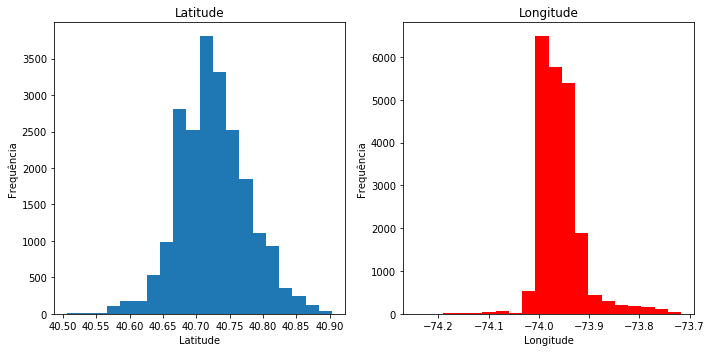

In [4]:
#plotando, através de subplots, os histogramas da latitude e longitude.

fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=x['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=x['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Os histogramas acima evidenciam que a quantidade de airbnbs é concentrada em torno das longitudes -74 e -73.9, enquanto as latitudes são um pouco mais diluídas, mas também concentradas entre a faixa de 40.65 e 40.80. Dito isso, é possível ver uma clara concentração dos apartamentos nas latitudes/longitudes centrais, algo que pode justificar uma elevação dos preços nessa região, não somente por uma potencial melhor qualidade ou localização, mas também pela suposição de que uma região com uma densidade de apartamentos muito maior terá uma quantidade de apartamentos mais caros maior do que em outras regiões, mesmo assumindo que a probabilidade de um apartamento ser caro seja a mesma para todas as regiões.

Abaixo, foi plotado um gráfico tridimensional que mostra um plano composto pela latitude e longitude (eixos x e y, respectivamente), e com o preço no eixo z, para que a relação entre latitude, longitude, e preço possa ser analisada. O gráfico deste arquivo, entretanto, mostra somente a visão por um ângulo, algo que pode prejudicar a análise. Para visualizar o gráfico de maneira interativa, o arquivo "gráfico_interativo.ipynb" deve estar disponível na mesma pasta que este.

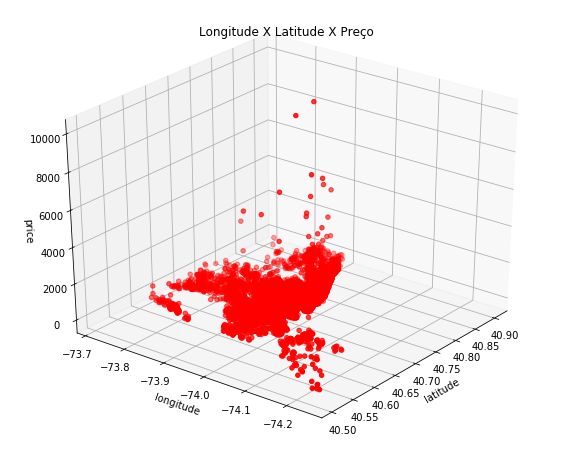

In [5]:
#plotando o gráfico 3d da longitude e longitude.

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('price')
ax.set_title('Longitude X Latitude X Preço')
plt.show()

Ao analisar o gráfico acima, especialmente através de sua visualização interativa, pode-se evidenciar claramente que há uma concentração de apartamentos com um preço mais alto, em torno do centro do gráfico, nas latitudes 40.6->40.8, e nas longitudes -74->-73.9. Dessa forma, é possível visualisar um aumento nos preços na região central da cidade, algo que pode ser fruto da maior quantidade de apartamentos na região (como foi explicado pela suposição previamente mencionada), de variáveis como localização e qualidade serem de fato mais apelativas e portanto aumentam o preço, ou uma combinação dos dois fatores.

Para visualizar separadamente a relação entre longitude, latitude, e preço, foram plotados os gráficos de maneira bi-dimensional abaixo, a fim de analisar latitude e longitude separadamente.

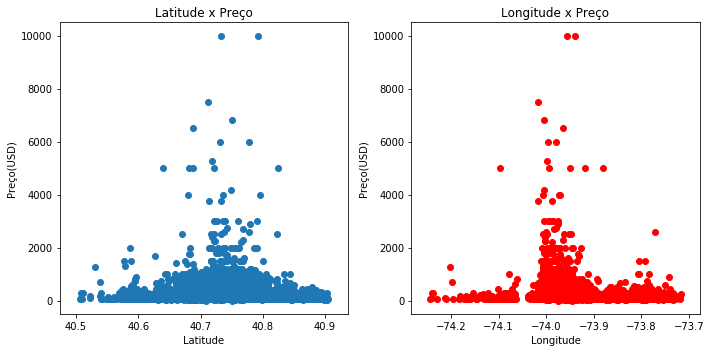

In [6]:
#plotando a relação entre longitude, latitude, e preço, em gráficos separados.

fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x['latitude'],y)
plt.title('Latitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Latitude')

plt.subplot(122)
plt.scatter(x['longitude'],y,color='r')
plt.title('Longitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Como pode ser evidenciado nos gráficos acima, as concentrações de preço préviamente mencionadas de fato ocorrem na região central, especialmente quando considerando a longitude, uma vez que seus dados aparentam estar concentrados de maneira mais forte em torno da longitude -74, enquanto a concentração na latitude é um pouco mais dispersa (tendo alguns valores mais caros começando nas latitudes mais extremas, não só no centro), apesar de ainda existente.

Para compreender ainda mais a fundo a concentração dos apartamentos mais caros, abaixo podem ser visualisados histogramas que contém apenas os apartamentos cujos preços são acima da média.

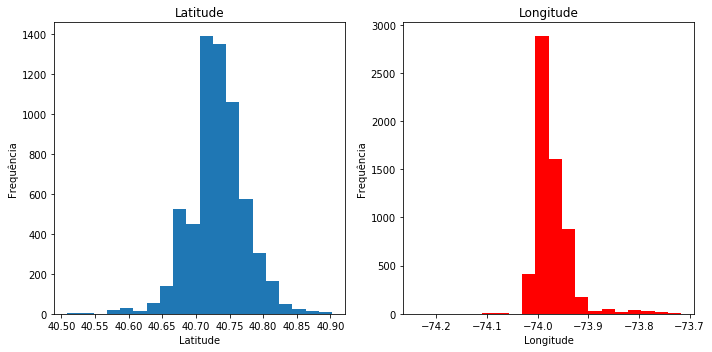

In [7]:
media_price=dados.price.mean()
data=dados[dados.price>media_price]
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=data['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=data['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Nos histogramas acima, são evidenciadas as mesmas tendências de concentração vistas nos scatterplots analisados previamente. Isso significa, que a quantidade de apartamentos acima da faixa média de preços está de fato concentrada em torno da latitude 40.7->40.8 e da longitude -74->-73.9. Pouco mais de 3500 (de um total de 7350) apartamentos estão listados entre latitudes 40.7 e 40.75, e quase todos estão entre as longitudes -74.05 e -73.9. Dessa forma, pode-se dizer que as coordenadas de um apartamento podem ter um impacto em seu preço, vistas as concentrações demonstradas na análise.

Portanto, esses atributos são importantes para poder predizer o preço de um apartamento, e assim devem ser incorporados em um modelo preditivo.

### 2.2 Quantidade de reviews por mês:

A quantidade de reviews por mês que um apartamento tem, pode dar a idéia de confiança ao consumidor e assim aumentar a demanda e portanto o preço de um apartamento no longo prazo. Para ver se essa hipótese se aplica ao database em questão, é importante verificar tanto a distribuição da quantidade de reviews por mês quanto sua relação com o preço de um apartamento.

Abaixo, está o histograma que mostra a distribuição da quantidade de reviews por mês.

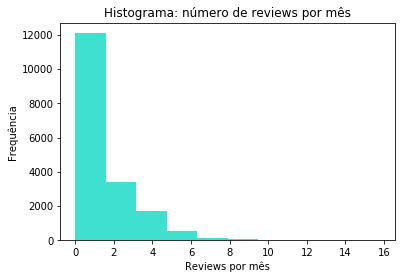

In [8]:
#plotando o histograma da variável.

dados.reviews_per_month.plot.hist(bins=10,color='turquoise')
plt.ylabel('Frequência')
plt.xlabel('Reviews por mês')
plt.title('Histograma: número de reviews por mês')
plt.show()

Como pode ser evidenciado no histograma acima, a vasta maioria dos apartamentos tem menos de seis reviews por mês, sendo que grande parte está concentrada entre 0-2. Isso é de ser esperado, pois muitas vezes os apartamentos não são alugados múltiplas vezes por mês, fazendo com que estes valores sejam de fato baixos. Entretanto, como nas variáveis latitude/longitude, vale mencionar que devido à grande concentração em torno dos valores mais baixos, pode ser que hajam mais apartamentos caros nesses valores simplesmente por haverem mais apartamentos no geral.

Abaixo, está o scatterplot que mostra a relação entre a variável em questão e o preço dos apartamentos.

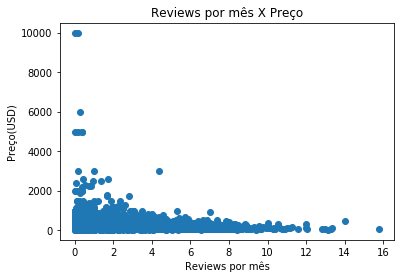

In [9]:
#plotando reviews por mês e preço.

plt.scatter(dados['reviews_per_month'],dados['price'])
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

No gráfico acima, pode se notar que os preços mais baixos estão distribuídos de maneira uniforme, enquanto os valores mais altos estão mais concentrados nos apartamentos com poucos reviews. Como mencionado acima, isso pode ser mera casualidade, devido à maior presença de apartamentos nessa faixa de reviews (como mostra o histograma). Para ter uma noção diferente do gráfico, a fim de notar se de fato existe uma certa relação entre os dados ou não, o mesmo scatterplot foi plotado abaixo em escala logarítmica.

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


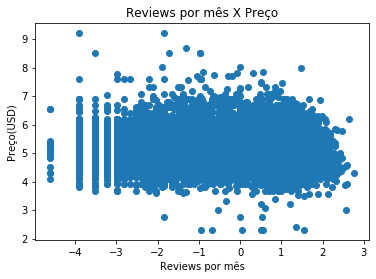

In [10]:
#plotando a mesma relação de cima, mas em escala logarítmica.

plt.scatter(np.log(dados['reviews_per_month'], dtype='float64'),np.log(dados['price'], dtype='float64'))
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

Como pode ser evidenciado acima, o atributo 'reviews por mês' não tem quase nenhuma relação com o preço de um airbnb. Portanto, é altamente provável que a hipótese de que os preços mais altos se concentrando nos valores menores seja uma mera consequência do fato de que existe uma concentração muito maior de apartamentos nesses valores.

Dessa forma, o atributo em questão não se mostra muito importante para a predição do preço de um apartamento, uma vez que sua relação com o preço é extremamente precária.

### 2.3 Burgos de Nova Iorque:

In [11]:
#Restringindo os preços dos apartamentos para no máximo 1000 dólares, uma vez que os 
#valores acima destes eram poucos e assim são tratados como outliers
dados = dados.loc[((dados.price > 10) & (dados.price < 1000))]

In [12]:
manhattan = dados.loc[(dados.neighbourhood_group == 'Manhattan')]
brooklyn = dados.loc[(dados.neighbourhood_group == 'Brooklyn')]
queens = dados.loc[(dados.neighbourhood_group == 'Queens')]
bronx = dados.loc[(dados.neighbourhood_group == 'Bronx')]
statenisland = dados.loc[(dados.neighbourhood_group == 'Staten Island')]

In [13]:
#Utilizando o describe para entender as variáveis
manhattan['price'].describe()

count    10122.000000
mean       222.128236
std        132.334552
min         11.000000
25%        140.000000
50%        190.000000
75%        250.000000
max        999.000000
Name: price, dtype: float64

In [14]:
brooklyn['price'].describe()

count    8835.000000
mean      168.620260
std       102.913529
min        11.000000
25%       105.000000
50%       145.000000
75%       199.000000
max       999.000000
Name: price, dtype: float64

In [15]:
statenisland['price'].describe()

count    163.000000
mean     135.871166
std      105.631326
min       48.000000
25%       75.000000
50%      100.000000
75%      150.000000
max      800.000000
Name: price, dtype: float64

In [16]:
queens['price'].describe()

count    1980.000000
mean      142.102020
std        81.096999
min        15.000000
25%        92.000000
50%       120.000000
75%       169.000000
max       900.000000
Name: price, dtype: float64

In [17]:
bronx['price'].describe()

count    350.000000
mean     124.702857
std       83.269423
min       28.000000
25%       80.000000
50%      100.000000
75%      140.000000
max      670.000000
Name: price, dtype: float64

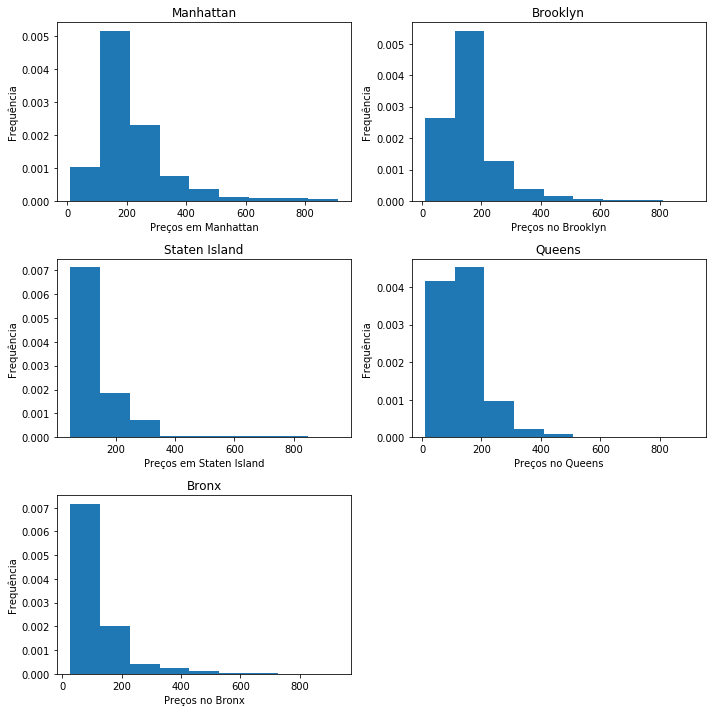

In [18]:
#Plot de histogramas de cada burgo para visualizar a distribuição da quantidade de preços e casas.
fig = plt.figure(figsize=(10, 10))

#Faixas personalizadas para cada burgo, como cada um tem suas especificações.
faixaman = range(10,1000,100)
faixabrook = range(10,1000,100)
faixastaten = range(48,1000,100)
faixabronx = range(28,1000,100)
faixaqueens = range(10,1000,100)

plt.subplot(321)
plot=manhattan['price'].plot.hist(bins=faixaman,density=True)
plt.title('Manhattan')
plt.ylabel('Frequência')
plt.xlabel('Preços em Manhattan')


plt.subplot(322)
plot=brooklyn['price'].plot.hist(bins=faixabrook,density=True)
plt.title('Brooklyn')
plt.ylabel('Frequência')
plt.xlabel('Preços no Brooklyn')


plt.subplot(323)
plot=statenisland['price'].plot.hist(bins=faixastaten,density=True)
plt.title('Staten Island')
plt.ylabel('Frequência')
plt.xlabel('Preços em Staten Island')


plt.subplot(324)
plot=queens['price'].plot.hist(bins=faixaqueens,density=True)
plt.title('Queens')
plt.ylabel('Frequência')
plt.xlabel('Preços no Queens')


plt.subplot(325)
plot=bronx['price'].plot.hist(bins=faixabronx,density=True)
plt.title('Bronx')
plt.ylabel('Frequência')
plt.xlabel('Preços no Bronx')
plt.tight_layout()
plt.show()

In [19]:
#Cálculo de média e desvio padrão para plotar os gráficos.
#O desvio padrão serve para mostrar as variações nos preços de cada burgo, então uma barra de erro grande significa alta
#variação, e, ademais, uma possível desigualdade social.

man = manhattan['price'].mean()
brook =  brooklyn['price'].mean()
queenao =  queens['price'].mean()
bronxobas =  bronx['price'].mean()
staten = statenisland['price'].mean()
print('O preço médio de um Airbnb em Manhattan é: U$D', manhattan['price'].mean())
print('O preço médio de um Airbnb em Brooklyn é: U$D', brooklyn['price'].mean())
print('O preço médio de um Airbnb em Staten Island é: ', statenisland['price'].mean())
print('O preço médio de um Airbnb no Queens é: U$D', queens['price'].mean())
print('O preço médio de um Airbnb no Bronx é: U$D', bronx['price'].mean())

man_std = manhattan['price'].std()
brook_std =  brooklyn['price'].std()
queenao_std =  queens['price'].std()
bronxobas_std =  bronx['price'].std()
staten_std = statenisland['price'].std()

O preço médio de um Airbnb em Manhattan é: U$D 222.12823552657576
O preço médio de um Airbnb em Brooklyn é: U$D 168.62026032823997
O preço médio de um Airbnb em Staten Island é:  135.87116564417178
O preço médio de um Airbnb no Queens é: U$D 142.1020202020202
O preço médio de um Airbnb no Bronx é: U$D 124.70285714285714


Text(0, 0.5, 'Valor em U$D')

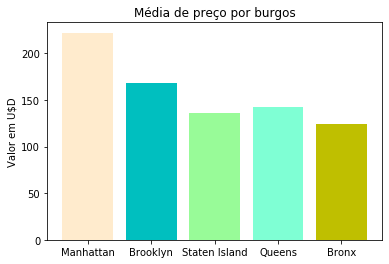

In [20]:
mean_burgos = {'Manhattan': man , 'Brooklyn': brook ,'Staten Island': staten, 'Queens': queenao, 'Bronx': bronxobas}
names=list(mean_burgos.keys())
values=list(mean_burgos.values())
plt.bar(names,values, color = ('blanchedalmond','c','palegreen','aquamarine','y'))
plt.title("Média de preço por burgos")
plt.ylabel('Valor em U$D')

In [21]:

burgos = ['Manhattan','Brooklyn','Staten Island','Queens','Bronx']
x_pos = np.arange(len(burgos))
medias_burgos = [man,brook,staten,queenao,bronxobas]
variacao = [man_std,brook_std,staten_std,queenao_std,bronxobas_std]

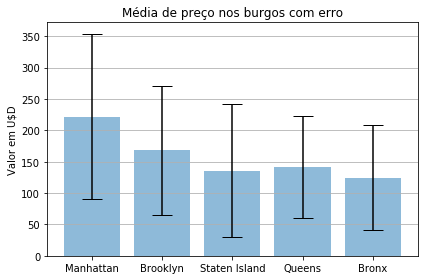

In [22]:
#Gráfico mostra a variação dos preços dentro de cada burgo
fig, ax = plt.subplots()
ax.bar(x_pos, medias_burgos, yerr=variacao, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Valor em U$D')
ax.set_xticks(x_pos)
ax.set_xticklabels(burgos)
ax.set_title('Média de preço nos burgos com erro')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

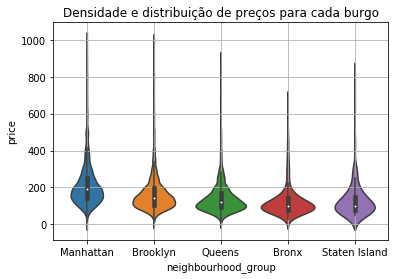

In [23]:
#Gráfico feito usando o seaborn, e mostra a variação e distribuição dos preços dentro de cada burgo.

densida_e_distr=sns.violinplot(data=dados, x='neighbourhood_group', y='price')
densida_e_distr.set_title('Densidade e distribuição de preços para cada burgo')
densida_e_distr.grid(True)

A variável tratada acima mostra a diferença no comportamento da variável preço de acordo com a região (burgo) em que ela é analisada. A análise começa por plotando histogramas de cada região que nos permite analisar como estão distribuídos os preços de acordo com a frequência na qual estes aparecem. A primeira "simplificação"/"iteração" feita para deixar este gráfico algo mais pertinente ao trabalho, foi estabelecer um valor máximo ao valor do apartamento em qualquer região. Por que isso? Quase em todas as regiões, o apartamento com o valor mais caro era em torno dos 2000 dólares e em certas ocasiões, este valor chegava aos 10.000 dólares. Dado isso, optamos por simplificar e considerar o valor máximo de custo do apartamento, 1000 dólares, assim era feita uma análise mais pertinente, com valores mais próximos uns dos outros ao invés de poucos distantes que poderiam afetar a média de maneira não muito"justa", já que estes apartamentos são absurdamente caros.

Seguindo a análise, foi feito um segundo gráfico. Neste, analisamos a diferença na média de preço nos 5 burgos e como, obviamente, Manhattan é o com a maior média (aptos mais cara\os) e o Bronx, a com a menor média (aptos mais baratos). Mas a análise não parou por aí. Após analisar isto, surgiu uma dúvida a nós. Com o conhecimento que temos de Nova Iorque, foi feita uma análise para descobrir qual era o grau de erro presente nesse gráfico. O grau de erro, neste caso, era interprestado como a variação de preço nos diferentes burgos, eis que chegamos à conclusão que em Manhattan há uma variação maior no preço do que em qualuqer outro burgo. Isso acontece por dois motivos. O primeiro é que nossa amostra tem uma quantidade muito maior de  apartamentos em Manhattan, o que causa estes sterem uma maior variação entre eles, e o segundo é que os apartamentos em  lugares como o Bronx, tendem a ser mais padrão, não variando tanto de um para outro.

O último gráfico, feito com o seaborn, somente evidencia e mostra como os apartamentos de Manhattan (mesmo que mais caros) demonstram estarem mais espalhados no preço do que os outros burgos. 

### 2.4 Disponibilidade:

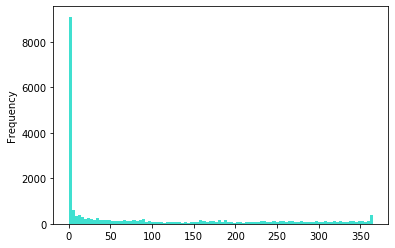

In [24]:
dados.availability_365.plot.hist(bins=100,color='turquoise')

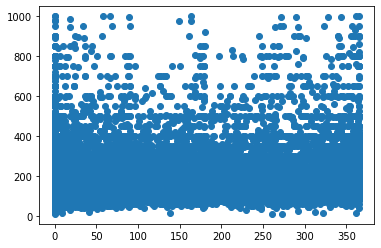

In [25]:
plt.scatter(dados.availability_365,dados.price)

A variável a ser analisada nesta seção é a chamada 'availability 365', que representa a quantidade de dias, no último ano, que o apartamento esteve disponível para aluguel. Como se trata de uma variável quantitativa, e trata o tópico de disponibilidade de aluguel de apartamentos, ela não oferece muita discussão se ele é analisada separadamente de todo resto, ou  seja, sozinha.

Por isso, tentamos compara-la à uma variável que  está bastante presente em nosso trabalho e esta é o preço dos apartwamentos em dólares americanos. Como pode-se observar acima, os valores em dólar  e a disponibilidade não fornecem qualquer tipo de correlação para a análise quantitativa do trabalho. Se nos aprofundarmos  no entendimento do trabalho, esta variável pode vir a ser  útil mais tarde, mas neste estágio de análise exploratória,  já provou ser uma variável que não terá muita importância no começo.

### 2.5 Minimum nights:

A quantidade noites minimas de um apartamento, mostra  o perfil do dono do apartamento, e o que ele espera para o seu apartamento, quantas noites são necessárias no minímo para uma pessoa poder alugar o apartamento. Para ver se essa variavel é impactante no database,  se aplica ao database em questão, é importante verificar tanto a quantidade minima de noites quanto sua relação com o valor de um apartamento.

Na próxima celula está o histograma que mostra a distribuição da quantidade de noites minimas.

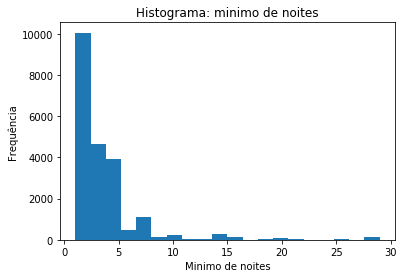

In [26]:
# Histograma da variável de "minimum nights" para ver a distribuição dos dados

dados.minimum_nights.plot.hist(bins=20)
plt.ylabel('Frequência')
plt.xlabel('Minimo de noites')
plt.title('Histograma: minimo de noites')
plt.show()

Como o histograma esta apresentando,a maioria dos dados estão concentrados entre 1 e 5, porém alguns apartamentos tem numeros maiores de noites minimas. Esses dados podem ser justificados pelo fato de muitos donos não quererem alugar seus apartamentos somente por 1 noite, porém não deixam o minimo de noites muito alto pois pouquíssimas pessoas alugam por muitos dias.

Na celula abaixo esta um grafico de disperção que relaciona o numero minimo de noites com o preço dos apartamentos.

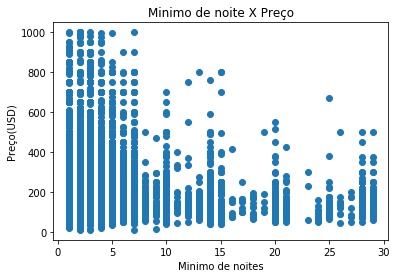

In [27]:
#Gráfico de disperção da variável "minimum nights" em comparação com o preço

plt.scatter(dados['minimum_nights'],dados['price'])
plt.xlabel('Minimo de noites')
plt.ylabel('Preço(USD)')
plt.title('Minimo de noite X Preço')
plt.show()

No grafico acima, um padrão que pode ser pecebido, é que os precos por volta de $1000.00 estão bem distribuidos, porém o resto esta bem disperso. Então, este grafico esta plotado na celula abaixo com uma escala logarítmica.

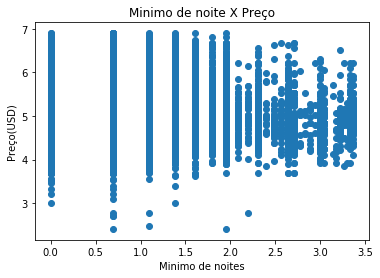

In [28]:
#Gráfico logarítmico de disperção da variável "minimum nights" em comparação com o preço

plt.scatter(np.log(dados['minimum_nights'], dtype='float64'),np.log(dados['price'],dtype='float64'))
plt.xlabel('Minimo de noites')
plt.ylabel('Preço(USD)')
plt.title('Minimo de noite X Preço')
plt.show()

Como pode ser visto no grafico acima, os dados estão bem dispersos e uma relação do numero minimo de noites e o preço do airbnb é fraquíssima. Pode se ver que os dados estão ce concentrando pro meio, porém ainda assim os dados continuam bem complexos.

Portanto, o numero minimo de noites não é uma variável que tem muito impacto no preço dos apartamentos.

### 2.6 Calculated host listing count:

Essa nova variável "calculated host listing count" é o número real das listagens de hosts (donos dos apartamentos), isso seria um outro método para medir a experiência do dono do apartamento. Muitas pessoas que vão procurar um airbnb utliziam esse fator para escolher algum, e novamente, essa variável sera comparada com o preço dos apartamentos, para ver se ela interfere no valor deles.

Desta forma, um histograma desta variável esta apresentada abaixo:

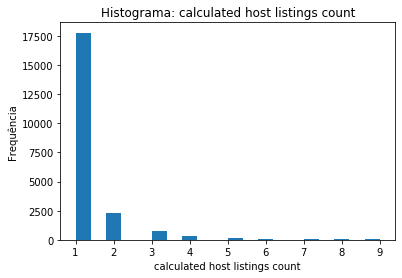

In [29]:
# Histograma da variável de "calculated host listing count" para ver a distribuição dos dados

dados.calculated_host_listings_count.plot.hist(bins=20)
plt.ylabel('Frequência')
plt.xlabel('calculated host listings count')
plt.title('Histograma: calculated host listings count')
plt.show()

Como pode ser visto, a maioria dos dados neste histograma estão concentradas perto do numero 1, que tem uma grande frequencia de valores. A partir do numero 5 os dados estão com pequenas frequencias. Tal fato mostra que a variavel esta bem concentrada nos valores baixos, desta forma, os donos do apartamento com baixa frequencia tem uma baixa aparencia no histograma.

Da mesma forma que as outras variaveis foram analisadas, abaixo esta um grafico de dispersão que relaciona o valor dos airbnb's e o valor desta varável. 

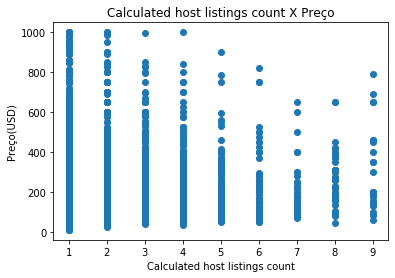

In [30]:
#Gráfico de disperção da variável "calculated host listing count" em comparação com o preço

plt.scatter(dados['calculated_host_listings_count'],dados['price'])
plt.xlabel('Calculated host listings count')
plt.ylabel('Preço(USD)')
plt.title('Calculated host listings count X Preço')
plt.show()

Como novamente o grafico ficou bem  concentrado com os valores até $2000.00, o grafico da celula abaixo esta representado na celula abaixo em função logaritmica.

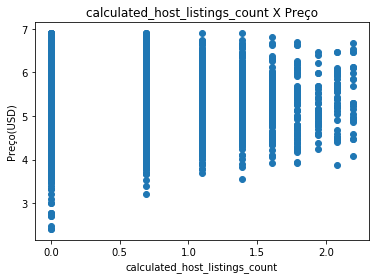

In [31]:
#Gráfico logarítmico de disperção da variável "calculated host listing count" em comparação com o preço

plt.scatter(np.log(dados['calculated_host_listings_count'], dtype='float64'),np.log(dados['price'],dtype='float64'))
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Preço(USD)')
plt.title('calculated_host_listings_count X Preço')
plt.show()

Como foi evidenciado acima, o grafico não tem uma relação aparente, os dados estão muito bem distribuidos. Portanto, o valor dos apartamentos não esta relacionado com o o numero de listagens do dono do apartamento.Desta forma, a variável não é muito impactante no valor dos apartamentos, e as outras variaveis em questão podem ter uma influencia maior no valor dos apartamento.

### 2.7 Last review:

A variável de "last review" representa a ultima avaliação que o apartamento teve. Na celula abaixo os valores vão ser passados para datas, e depois para numero de dias, para uma analise poder ser feita.

In [32]:
#mudança dos dados de last review para dias

dados.last_review=pd.to_datetime(dados.last_review)
pd.to_timedelta(dados.last_review).head()

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  after removing the cwd from sys.path.


1   18037 days
3   18082 days
4   17854 days
5   18069 days
9   18056 days
Name: last_review, dtype: timedelta64[ns]

No final decidimos não utilizar essa variavel pois varios dados estão sem a data, então não teriamos um dataset completo. Desta forma, acreditamos que tirando essa variavel da analise estamos deixando a pesquisa menos imparcial, já que os varios dados não vão ser excluidos.

### 2.8 Number of reviews


In [33]:
#utilizando o describe para entender a variável

n= dados["number_of_reviews"]
n.describe()

count    21450.000000
mean        25.528858
std         44.620163
min          0.000000
25%          1.000000
50%          7.000000
75%         28.000000
max        488.000000
Name: number_of_reviews, dtype: float64

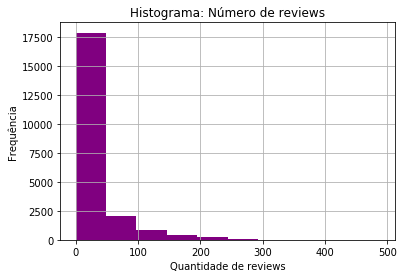

In [34]:
#plotando o histograma

dados.number_of_reviews.hist(bins=10,color='purple')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de reviews')
plt.title('Histograma: Número de reviews')
plt.show()

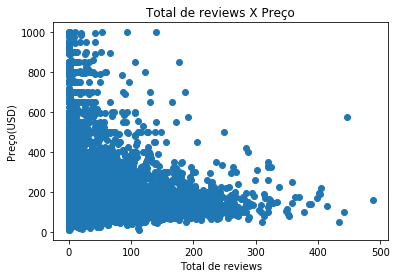

In [35]:
#plotando o scatterplot para entender o impacto do número de reviews no preço.

plt.scatter(dados['number_of_reviews'],dados['price'])
plt.xlabel('Total de reviews')
plt.ylabel('Preço(USD)')
plt.title('Total de reviews X Preço')
plt.show()

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


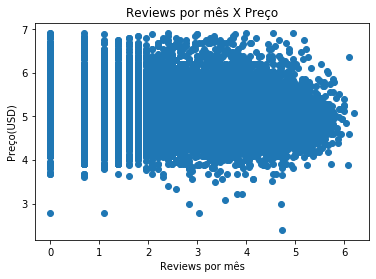

In [36]:
#mesmo gráfico que acima mas em escala logarítmica.

plt.scatter(np.log(dados['number_of_reviews'], dtype='float64'),np.log(dados['price'], dtype='float64'))
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

Para ver se o numero de reviews que um Airbnb tem é uma variavel relevante fizemos um gráfico que fizemos um gráfico com o total de reviews pelo preço, percebemos que podia ter uma certa relevancia mas ao plotar um gráfico com log percebemos que não há relevância nenhuma e que não será uma variável relevante para uma futura análise.


### 2.9 Neighborhood

In [37]:
#value_counts para entender a quantidade de apartamentos nos nove maiores bairros.

w= dados.neighbourhood.value_counts()
w.head(9)

Williamsburg          1752
Bedford-Stuyvesant    1490
East Village          1054
Upper East Side        978
Upper West Side        942
Harlem                 942
Hell's Kitchen         873
Crown Heights          713
Chelsea                646
Name: neighbourhood, dtype: int64

In [38]:
len(dados.neighbourhood.value_counts())

214

In [39]:
#restringindo os dados.

Williamsburg = dados.loc[(dados.neighbourhood == 'Williamsburg')]
Bedford = dados.loc[(dados.neighbourhood == 'Bedford-Stuyvesant')]
Upper_East_Side = dados.loc[(dados.neighbourhood == 'Upper East Side')]
Upper_West_Side = dados.loc[(dados.neighbourhood == 'Upper West Side')]
Hells_Kitchen = dados.loc[(dados.neighbourhood == "Hell's Kitchen")]
East_Village = dados.loc[(dados.neighbourhood == 'East Village')]
Midtown = dados.loc[(dados.neighbourhood == 'Midtown')]
Harlem = dados.loc[(dados.neighbourhood == 'Harlem')]
Chelsea = dados.loc[(dados.neighbourhood == 'Chelsea')]

In [40]:
#calculando o preço médio,

wil = Williamsburg['price'].mean()
bed = Bedford['price'].mean()
ues= Upper_East_Side['price'].mean()
uws = Upper_West_Side['price'].mean()
hells = Hells_Kitchen['price'].mean()
eastvill = East_Village['price'].mean()
mid = Midtown['price'].mean()
harl = Harlem['price'].mean()
chel = Chelsea['price'].mean()

print('O preço médio de um Airbnb em Williamsburg é: {0}'.format(wil))
print('O preço médio de um Airbnb em Bedford é: {0}'.format(bed))
print('O preço médio de um Airbnb em Upper East Side é: {0}'.format(ues))
print('O preço médio de um Airbnb em Upper West Side é: {0}'.format(uws))
print("O preço médio de um Airbnb em Hell's Kitchen é: {0}".format(hells))
print('O preço médio de um Airbnb em East Village é: {0}'.format(eastvill))
print('O preço médio de um Airbnb em Midtown é: {0}'.format(mid))
print('O preço médio de um Airbnb em Harlem é: {0}'.format(harl))
print('O preço médio de um Airbnb em Chelsea é: {0}'.format(chel))

O preço médio de um Airbnb em Williamsburg é: 200.42180365296804
O preço médio de um Airbnb em Bedford é: 147.848322147651
O preço médio de um Airbnb em Upper East Side é: 199.00715746421267
O preço médio de um Airbnb em Upper West Side é: 216.85138004246284
O preço médio de um Airbnb em Hell's Kitchen é: 246.09049255441008
O preço médio de um Airbnb em East Village é: 212.18406072106262
O preço médio de um Airbnb em Midtown é: 270.7265625
O preço médio de um Airbnb em Harlem é: 169.52972399150744
O preço médio de um Airbnb em Chelsea é: 257.3111455108359


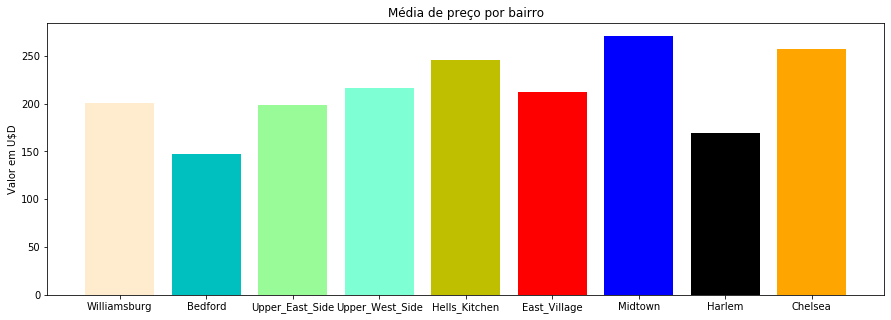

In [41]:
#plotando o preço médio

mean_neighborhood = {'Williamsburg': wil , 'Bedford': bed , 'Upper_East_Side': ues, 'Upper_West_Side': uws, 'Hells_Kitchen': hells, 'East_Village': eastvill, 'Midtown':mid, 'Harlem':harl, 'Chelsea':chel}
Names=mean_neighborhood.keys()
Values=mean_neighborhood.values()
plt.figure(figsize=(15,5))
plt.bar(Names,Values, color = ('blanchedalmond','c','palegreen','aquamarine','y','r','b','black','orange'))
plt.title("Média de preço por bairro")
plt.ylabel('Valor em U$D')
plt.show()

Para fazer a análise dos bairros (neighbourhood) como eram muitos ia ficar muito dificil a visualisação do grafico, para resolver esse problema foram selecionadas os nove bairros que possuiam mais Airbnbs, para isso foi feito o preço médio de um Airbnb em cada região, criamos um gráfico de barras da média de preço por bairro, com esse gráfico podemos perceber que dependendo do bairro o valor do aluguel pode ser mais caro ou mais barato, um dos motivos que isso pode ter ocorrido é que cada bairro tem suas rspectivas características. Um bairro em que há uma concentração maior de pessoas pode ter um preço maior.

## 3. Modelo preditivo:

A análise exploratória evidenciou que as váriaveis a que mais impactam o preço de um apartamento são latitude, longitude, e bairro. Portanto, esses são os atributos que serão utilizados para treinar os modelos. Como foi explicado na introdução do projeto, abaixo estão os três modelos, regressão através do método dos mínimos quadrados e árvore de decisões, e classificação através de árvore de decisões.

O modelo é construído a partir de regressão com um aprofundamento na utilização de árvores de decisão regressiva. A árvore, por sua vez, é um modelo estatístico que usa uma base de treinamento para classificar dados, o que realmente é a 'essência' do trabalho, classificar os apartamentos do Airbnb de  acordo com seu preço e localização.

### 3.1 Regressão por método dos mínimos quadrados:

A regressão abaixo tem como objetivo achar a relação que melhor estima o preço de um apartamento, dado sua longitude, latitude, e bairro. O método dos mínimos quadrados, utilizado abaixo, funciona como uma técnica de otimização que acha o melhor ajuste para assim obter a relação mencionada acima. Para fazer isso, o modelo minimiza a soma dos quadrados das diferenças entre o valor real e o valor estimado. 

Nossa escolha por trás deste método foi o fato de que dado uma latitude, longitude, e bairro, ele poderia predizer um preço exato para um apartamento, o que é o objetivo principal do projeto.

In [42]:
#definindo uma função que crie uma regressão através do Método dos Mínimos Quadrados.
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [43]:
#restringindo a base de dados para uma somente com as variáveis que foram julgadas relevantes, e definindo as como x e y, para que a regressão seja feita. 
y=dados['price'] 
x=dados[['latitude','longitude','neighbourhood_group']]

#Criando 'dummies' para poder fazer uma regressão todas as variáveis escolhidas, mesmo as qualitativas.
x=pd.get_dummies(data=x,drop_first=True)

#separando a base de dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [44]:
#fazendo a regressão com a base de treino, assim treinando o nosso modelo.
regressao=regress(X_train,y_train)

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
#utilizando a função "predict" do modelo OLS, para obter as predições do nosso modelo. Isso foi feito tanto para a base teste quanto treino, para poder compará-las.

X_test_const=sm.add_constant(X_test)
y_pred_test=regressao.predict(X_test_const)

X_train_const=sm.add_constant(X_train)
y_pred_train=regressao.predict(X_train_const)

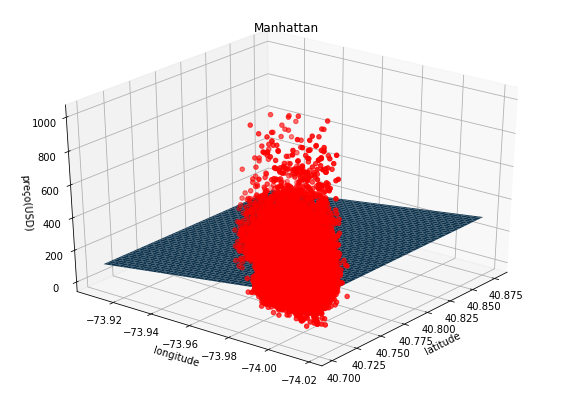

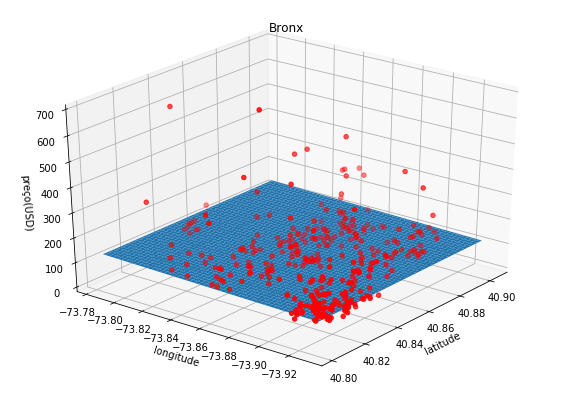

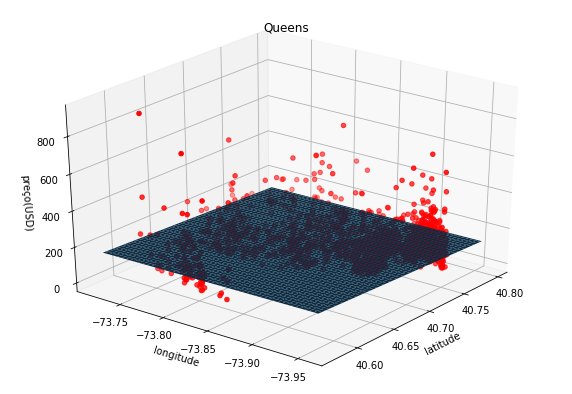

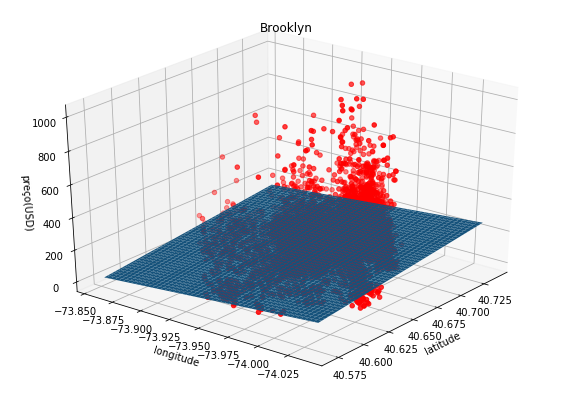

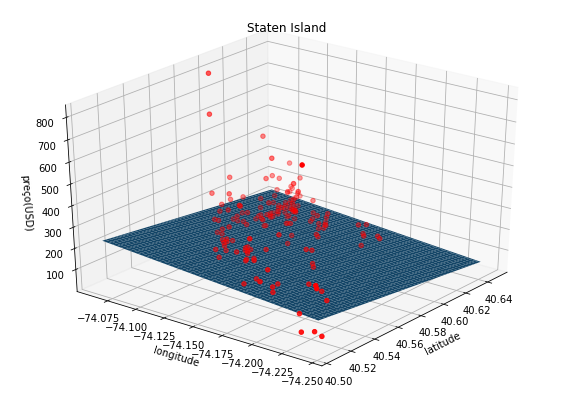

In [46]:
#plotando os dados reais junto com a regressão, separado por burgo.

def plots(grupo):
    dados_grupo=dados[dados.neighbourhood_group==grupo]
    y=dados_grupo['price']
    x=dados_grupo[['latitude','longitude','neighbourhood_group']]

    x=pd.get_dummies(data=x,drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    regressao=regress(X_train,y_train)
    c=regressao.params['const']
    lat=regressao.params['latitude']
    long=regressao.params['longitude']

    def f(latitude,longitude):
        return c + lat*latitude + long*longitude
    
    npoints=100
    latitude= np.linspace(x['latitude'].min(), x['latitude'].max(), npoints)
    longitude= np.linspace(x['longitude'].min(), x['longitude'].max(), npoints)
    latitude_x , longitude_y = np.meshgrid(latitude,longitude)
    s = f(latitude_x,longitude_y)

    
    fig=plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(latitude_x,longitude_y,s)
    ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
    ax.view_init(30,-142)
    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')
    ax.set_zlabel('preço(USD)')
    plt.title(grupo)
    plt.show()
    
    
plots('Manhattan')
plots('Bronx')
plots('Queens')
plots('Brooklyn')
plots('Staten Island')

Os gráficos acima representam as regressões nos 5 burgos de Nova Yorque. Este possuem 3 eixos: longitude, latitude e preço. Analisando em conjunto, os 3 conseguem traduzir quão caro é um apartamento postado no Airbnb dependendo de sua localização. Para isso, ele usa o método de regressão e assim apresenta um plano, que justamente representa essa regressão. Os pontos vermelhos representam os apartamentos postados na plataforma on-line de aluguel de apartamentos/casas.

Uma anotação à análise é o fato de não termos a mesma surface para todos os burgos, assim, passamos a analisar os gráficos de maneira mais micro, focando em cada burgo por si mesmo.

Analisando o gráfico de Manhattan, temos que o preço dos apartamentos, primeiramente, são mais elevados que no resto dos burgos e que dentro de sua própria região, o preço não obtem uma relação simples e clara de acordo com a localização. Isso pode ser percebido porque os dados estão todos 'juntos' e mesmo assim possuem uma certa variação no preço. A visualização vertical nesse gráfico ajuda, pois por mais que pareça ter uma relação, o fato de que os pontos estão juntos não significa que estes são correlacionados, mas sim, que são independentes.

O segundo gráfico, do Bronx, apresenta os pontos mais espalhados e um plano praticamente reto (nos U$D 100). Percebe-se também que os valores mais diferentes, ou seja, os "outliers", estão localizados, por sua maior parte, nas extremaidades do burgo. Isso se comprova pelo fato de que ao que se  observa as 'paredes' do plano, é possível ver que o preço possui uma diferença significante.

Analisando o gráfico de Queens, os pontos estão um pouco mais juntos do que no gráfico anterior, mas algo similar aparece em ambas. As extremidades do gráfico também apresentam preços mais elevados. Novamente, como o burgo dos Queens e dos Bronx possuem uma qualidade de vida menor, os apartamentos nestes locais tendem a ser mais baratos, e quanto mais longe destes "subúrbios", mais caro é o apartamento.

Já Brooklyn, o caso é diferente. Neste gráfico, podemos estabelecer relações com ambos os casos anteriormente apresentados. Ao perceber que os preços tendem a aumentar quanto mais longe do burgo estão, ao comparar as coordenadas, percebe-se que os preços elevados estão relacionados ao fato de que Brooklyn está colado em Manhattan! Ou seja, como os apartamentos estão cada vez mais chegando perto de Manhattan, o preço deles aumenta.

Por último, Staten Island possui um gráfico diferente de todos os outros. Este possui alguns outliers que fazem com que sua linha de regressão possa ser um pouco prejudicada, mas é possível perceber que seu plano de regressão tem um "sentido" diferente. Ou seja, quanto mais longe do "meião" mais caro está o apartamento. Isso pode significar uma certa "exclusividade" por conta daqueles que alugam apartamentos lá.

In [47]:
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     264.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          4.94e-324
Time:                        18:47:02   Log-Likelihood:                -99167.
No. Observations:               16087   AIC:                         1.983e+05
Df Residuals:                   16080   BIC:                         1.984e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.817e+04   2864.493     -9.835      0.000   -3.38e+04   -2.26e+04
latitude                           -197.9196     27.961     -7.078      0.000    -252.727    -143.113
longitude                          -492.3780     32.357    -15.217      0.000    -555.802    -428.954
neighbourhood_group_Brooklyn        -21.0590      8.782     -2.398      0.016     -38.272      -3.846
neighbourhood_group_Manhattan        38.7338      8.235      4.704      0.000      22.593      54.875
neighbourhood_group_Queens            3.4981      8.574      0.408      0.683     -13.307      20.303
neighbourhood_group_Staten Island  -145.7265     15.467     -9.422      0.000    -176.043    -115.410
==============================================================================
Omnibus:                     9059.062   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81654.885
Skew:                           2.602   Prob(JB):                         0.00
Kurtosis:                      12.734   Cond. No.                     2.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Este modelo demonstra o quanto uma dessas variavies, 'latitude', 'longitude', e 'neighbourhood group' é importante para analisar o preço do apartamento. 

O Prob (Omnibus) é o valor -p desse teste de normalidade de resíduos. Como o Prob (Omnibus) é 0, existe evidência de que os resíduos não são distribuidos normalmente, assim, violam a suposição do modelo de regressão.

O Prob (JP) é o valor -p desse deste de normalidade. Como o Prob (JP) é 0 também, existe evidencia de que os residuisos não sao distribuidos normalmente, assim, violando nesse caso a suposição do modelo de regressão.


Portanto, como os dois testes mostraram que os resíduos não são distribuidos normalmente, a arvore de decisão regressiva será utilizada para testar um outro tipo de regressão e caso ela não funcione, uma categórica será construida.

In [48]:
#utilizando as funções do sklean para efetuar as medidas quantitativas de desempenho, e assim verificar a funcionalidade do nosso modelo.

print('mean error between y test and y predicted test: {0:.2f} '.format(metrics.mean_squared_error(y_test,y_pred_test)**0.5))
print('mean error between y trained and y predicted trained: {0:.2f} '.format(metrics.mean_squared_error(y_train, y_pred_train)**0.5))
print()
print('r2 score between y test and y predicted:{0:.2f} '.format(metrics.r2_score(y_test, y_pred_test)))
print('r2 score between y trained and y predicted trained:{0:.2f} '.format(metrics.r2_score(y_train, y_pred_train)))

mean error between y test and y predicted test: 113.58 
mean error between y trained and y predicted trained: 115.06 

r2 score between y test and y predicted:0.08 
r2 score between y trained and y predicted trained:0.09 


A função "mean error" apresenta a média da diferça entre os valores estimados e o valor real. No primeiro deles, isso foi calculado entre o testado e a previsão dos valores testados. E o resultado deu 113.58, o que é um número bem alto, mostrando que ele tem um erro alto, enquanto isso, o segundo que é entre o treinado e a previsão dos valores treinados, e o resultado deu 115.06, o que é um número bem alto também. Tal fato mostra que o modelo esta coerente, entre os valores testados e os treinados, porém também mostra que ele não é confiável, o que já foi mostrado anteriormente com os testes de normalidade.

A função "r2 score" é uma medida de ajustamento desta regressão linear. O r2 varia entre 0 e 1, indicando em porcentagem o quanto o modelo consegue explicar os valores observados, assim, quanto maior o r2, mais explicativ é o modelo, e melhor ele se ajusta a amostra. O r2 entre os valores testados e a previsão dos valores testados é 0.08, que significa 8%, o que é um numero muito baixo. Enquanto o r2 entre os valores treinados e a previsão dos valores treinados é 0.09, que significa 9%, o que também é um valor extremamente baixo. Mostrando novamente que os dois tem uma coerencia porém que a analise com este modelo de regressão não é confiável pois o ajuste da regressão linear é muito baixo.

### 3.2 Árvore de decisão regressiva:

Sentindo que o modelo acima não foi o suficiente, tentamos fazer uma árvore de decisão regressiva. Ela utiliza as condições e probabilidades obtidas na sua análise da base de treinamento, para poder fazer uma estimativa do preço exato de um apartamento (novamente, este sendo o objetivo principal do projeto). 

Infelizmente o âmbito visual da árvore não pôde ser explorado, devido ao mal funcionamento das bibliotecas necessárias no sistema operacional que utilizamos (windows/macOS). Entretanto, o valor estimado de cada apartamento ainda foi estimado normalmente, e comparado com os resultados de verdade (se referindo a base de teste).

In [49]:
#fazendo o mesmo processo de restrição e separação.

y=dados['price']
x=dados[['latitude','longitude','neighbourhood_group']]
x=pd.get_dummies(data=x,drop_first=True)
X_treina, X_testa, y_treina, y_testa = train_test_split(x, y, random_state=1)

In [50]:
#efetuando a regressão por meio de árvore de decisão com os dados de treinamento.
regressor = DecisionTreeRegressor(random_state = 0)  
model=regressor.fit(X_treina, y_treina)

In [51]:
#fazendo o predict com os dados de teste e treino.

y_pred_testa=model.predict(X_testa)
y_pred_treina=model.predict(X_treina)
y_testa= np.array(list(y_testa))
y_treina= np.array(list(y_treina))
y_pred_testa=np.array(y_pred_testa)
y_pred_treina=np.array(y_pred_treina)

#criando um dataframe que compara os preços reais com os estimados pelo modelo.
df=pd.DataFrame({'Actual':y_testa.flatten(),'Predicted':y_pred_testa.flatten()})

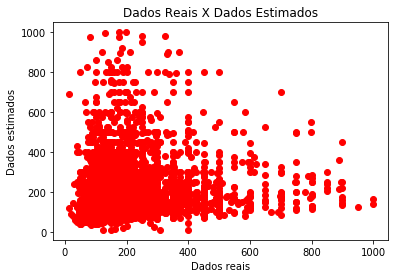

In [52]:
#fazendo um scatterplot para poder visualizar a diferença entre os preços reais e os do modelo.

plt.scatter(df.Actual,df.Predicted,color='r')
plt.title('Dados Reais X Dados Estimados')
plt.xlabel('Dados reais')
plt.ylabel('Dados estimados')
plt.show()

O scatterplot acima evidencia que apesar de haverem vários valores do nosso modelo próximos do correto, especialmente nos valores mais extremos tendem a ocorrem erros bastantes graves, como um apartamento de 999 dólares sendo estimado em torno de 200. Isso é algo que é provavelmente resultado da alta densidade de apartamentos na mesma faixa de preço independente de sua localização, algo que dificulta bastante o treinamento do modelo.

In [53]:
#utilizando as funções do sklean para efetuar as medidas quantitativas de desempenho, e assim verificar a funcionalidade do nosso modelo.

print('mean error between y test and y predicted test: {0:.2f} '.format(metrics.mean_squared_error(y_testa, y_pred_testa)**0.5))
print('mean error between y trained and y predicted trained: {0:.2f} '.format(metrics.mean_squared_error(y_treina, y_pred_treina)**0.5))
print()
print('r2 score between y test and y predicted:{0:.2f} '.format(metrics.r2_score(y_testa, y_pred_testa)))
print('r2 score between y trained and y predicted trained:{0:.2f} '.format(metrics.r2_score(y_treina, y_pred_treina)))

mean error between y test and y predicted test: 157.04 
mean error between y trained and y predicted trained: 3.31 

r2 score between y test and y predicted:-0.76 
r2 score between y trained and y predicted trained:1.00 


A função "mean error" , no primeiro deles, isso foi calculado entre o testado e a previsão dos valores testados, o resultado deu 157.04 , o que é um número bem alto, mostrando que ele tem um erro alto, enquanto isso, o segundo que é entre o treinado e a previsão dos valores treinados, e o resultado deu 3.31, o que é um número bem baixo. Tal fato mostra que o modelo esta coerente com o primeiro deles (nos valores testados), porém, nos valores treinados, como o numero é muito baixo, o erro é "muito baixo", porém so para esta amostra. O que pode trazer resultados ruins caso a amostra é trocada, provando novamente que este modelo não é confiável.

A função "r2 score" é uma medida de ajustamento desta regressão linear, o r2 entre os valores testados e a previsão dos valores testados é -0.76, o que é um numéro baixissimo, o que significa que o modelo encaixa nos dados de uma maneira muito fraca. Enquanto o segundo, que é entre os valores treinados e a previsão dos valores treinados é altissimo, mostrando que ele só é bom para esta amostra, já que o modelo não esta dando certo com os valores do teste. 

Desta forma, pode se conclusir que este modelo só foi "treinado" para ser utilizado com os dados apresentados, e quando novos dados forem apresentados, ele não funcionará.

### 3.3 Árvore de decisão categórica:

Além dos dois métodos feitos, fizemos uma árvore de decisão categórica. Diferentemente da regressiva, esse método é classificatório, e funciona de forma diferente. Ao invés de resultar em um preço específico por apartamento, ele retorna uma faixa de preços a qual o apartamento pertence. Isso continua sendo parte do objetivo do projeto, embora de maneira um pouco mais geral. Independente disso, ele ainda ajuda um indivíduo a saber o preço pelo qual ele deve cobrar seu apartamento no AirBnb, e portanto é bastante relevante. 

Funcionando de maneira bastante similar à árvore regressiva, a árvore de decisão categórica também utilizará as probabilidades e condições obitdas na análise da base de treinamento. Depois, será criada uma matriz de confusão que evidenciará quantos dos resultados estimados estão na mesma faixa que o apartamento realmente está, e a porcentagem de acerto do modelo será calculada.

In [54]:
#criando categorias para os dados de bairro, pois o modelo trabalha com números e não strings de texto.

data=dados.sort_values(by='id')
data.neighbourhood_group = data.neighbourhood_group.astype('category')
data.neighbourhood_group.cat.categories = (['0', '1', '2', '3', '4'])

neib=[]
for i in range(len(dados.neighbourhood.value_counts())):
    neib.append(i)
dados.neighbourhood = dados.neighbourhood.astype('category')
dados.neighbourhood.cat.categories = (neib)

In [55]:
#criando faixas de preço, e colocando cada apartamento em uma faixa. As faixas estão categorizadas como números, mas seus significados estão abaixo.

#0=cheap --> p<=150
#1=medium_low --> 150<=p<350
#2=medium_high --> 350<=p<600
#3=expensive --> p>=600


Price_cat=[]

for i in data.id:
    preco= float(dados[data.id==i].price)
    if preco<=150:
        Price_cat.append(0)
    elif preco<=350:
        Price_cat.append(1)
    elif preco<=600:
        Price_cat.append(2)
    else:
        Price_cat.append(3)
if 'Price_cat' not in dados.columns:
    data.insert(16,'Price_cat',Price_cat)
data.Price_cat=Price_cat

In [56]:
#restringindo o dataframe.

X = pd.DataFrame(data, columns=['latitude','longitude','neighbourhood_group']) 
y = pd.Categorical.from_codes(Price_cat, ['cheap','medium_low','medium_high','expensive'])

In [57]:
#obtendo as dummies.

y = pd.get_dummies(y)

In [58]:
#separando o dataframe em teste e treino.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
#efetuando a classificação através da base de dados de treino, assim treinando o modelo.

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
#comparando os resultados do modelo (com a base de dados de teste) e os preços reais de cada apartamento.

y_pred = dt.predict(X_test)
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)

#gerando uma confusion matrix, que mostra quantos resultados cairam na faixa certa. A soma desses foi feita abaixo, e depois a porcentagem de acerto foi calculada com base nesta.

x=confusion_matrix(species, predictions)

acertos=x[0][0]+x[1][1]+x[2][2]+x[3][3]
total=0
for lista in x:
    for i in lista:
        total+=i
porcentagem_acerto=acertos*100/total


print()
print('A porcentagem de acerto foi de {0:.2f}%'.format(porcentagem_acerto))

x


A porcentagem de acerto foi de 50.83%


array([[1504,  959,  108,   27],
       [ 939, 1176,  205,   43],
       [ 117,  157,   43,    8],
       [  19,   44,   11,    3]])

Este modelo aparenta ter funcionado em metade dos apartamentos, assim colocando-os na faixa de preço correta. Entretanto, dado a natureza mais geral das faixas (quando comparado à exatidão necessária para estimar um valor exato), este valor não acaba sendo alto o suficiente para considerar que o modelo funcionou muito bem. 

A matriz de confusão acima evidencia os positivos reais, negativos reais, falsos negativos, e falsos negativos, de cada faixa. A partir dela que foi calculada a porcentagem de acerto, uma vez que sua diagonal principal mostra os positivos reais, e portanto acertos. Ela permite ver, também, que a maior quantidade de erros se concentram nas faixas menores, estas sendo as mais baratas, especialmente a medium_low. Isso suporta a hipótese de que o mal funcionamento dos modelos pode ser consequência da alta quantidade de baixos valores, relativo à quantidade de apartamentos mais caros.

# Conclusão:

Em conclusão, após definirmos em nossa análise exploratória que os atributos relevantes são latitude, longitude, e bairro, foi bastante bom que tentamos três tipos de modelos, com dois tipos de técnica, pois podemos tirar conclusões mais concretas.

O fato de que nenhum dos três métodos funcionou inteiramente bem mostra que pode ser bastante difícil estimar o preço de um apartamento somente pela sua localização. Fatores como tamanho e quantidade de pessoas que cabem no apartamento também interferem bastante, mas por restrições da base de dados tivemos que tratar essas variáveis como se fossem associadas à localização, algo que pode ter prejudicado a análise. Apesar disso, a distribuição dos preços dos apartamentos provavelmente prejudica os modelos também. Como foi explicado na análise, o fato de que apesar da localização, a grande parte dos apartamentos permanece sendo concentrada em valores médio-baixos, prejudica muito as regressões e o classificador, uma vez que essa grande quantidade de apartamentos tende a "enganar" as técnicas ao induzi-las a predizir valores nessa faixa.

Além disso, foi interessante entender como que cada bairro da cidade tem a sua própria distribuição de preços, algo que pode atrapalhar muito a coerência dos resultados que estamos procurando. Manhattan, por exemplo, tem seu pico de preço muito mais concentrado que no Bronx, algo que novamente dificulta muito a predição feita pelos modelos utilizados.

Por fim, apesar de que os preços não estam corretamente estimados em algumas instâncias, tanto os modelos quanto a análise exploratória ajudam a explicar o cenário dos AirBnbs em Nova Iorque, e assim atingir, mesmo se parcialmente, o nosso objetivo inicial. O fato de que foram utilizados três modelos diferentes ajuda ainda mais, umas vez de que a convicção no projeto aumenta, especialmente uma vez que a conclusão do projeto foi que estimar o preço de um apartamento em Nova Iorque é extremamente complexo, algo que gera muitos erros durante as estimativas.

# Participação dos alunos:

Todos os alunos participaram igualmente do trabalho, entretanto, grande parte dos commits ao GitHub foram feitos somente por um aluno. Isso se deve ao fato de que parte do tempo gasto fazendo o trabalho foi em sala de aula, e portanto somente em um computador, com o qual todos nós trabalhavamos juntos. Além disso, quando tentamos utilizar a função merge do GitHub, algumas bibliotecas passaram a dar problema, e dessa forma decidimos juntar manualmente os notebooks, e ter só um de nós dar os commits. Pedimos que isso não seja considerado na nota, ao que declaramos conjuntamente que o trabalho foi feito igualmente por todos os integrantes do grupo.

# Referências:

 https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
 
 https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
 
 Aulas de Ciência dos Dados.
 
 https://seaborn.pydata.org